In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import os

# Set path to your dataset
dataset_path = '/content/drive/My Drive/Colab Notebooks/archive (3)/chest_xray/chest_xray/train'

# List the files to confirm the path is correct
print(os.listdir(dataset_path))


['.DS_Store', 'PNEUMONIA', 'NORMAL']


**Import Required Libraries**

In [2]:
import numpy as np
import pandas
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

**Visualize Sample Images**

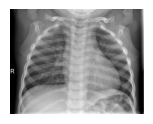

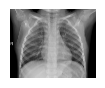

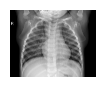

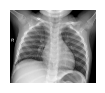

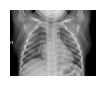

In [3]:
normal_images = os.listdir('/content/drive/My Drive/Colab Notebooks/archive (3)/chest_xray/chest_xray/train/NORMAL')
pneumonic_images = os.listdir('/content/drive/My Drive/Colab Notebooks/archive (3)/chest_xray/chest_xray/train/PNEUMONIA')

plt.figure(figsize=(10,10))
for i, img_path in enumerate(normal_images[:5]):
  img = cv2.imread(os.path.join('/content/drive/My Drive/Colab Notebooks/archive (3)/chest_xray/chest_xray/train/NORMAL', img_path), cv2.IMREAD_GRAYSCALE)
  #normal_images.reshape(75*75)
  ax = plt.subplot(2, 5, i+1)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.show()


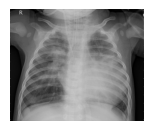

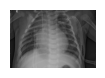

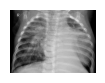

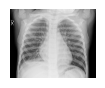

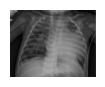

In [4]:

plt.figure(figsize=(10,5))
for i, img_path in enumerate(pneumonic_images[:5]):
  img = cv2.imread(os.path.join ('/content/drive/My Drive/Colab Notebooks/archive (3)/chest_xray/chest_xray/train/PNEUMONIA/', img_path), cv2.IMREAD_GRAYSCALE)
  plt.subplot(2, 5, i+1)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.show()
  plt.close

**Preprocess Data**

In [5]:
IMG_SIZE = 150
def image_process(img):
  resized = cv2.resize(img, (150, 150))
  normalized = resized/255
  return normalized

**Data** **Augmentation**

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/archive (3)/chest_xray/chest_xray/train/',
    #target-size = (IMG_SIZE, IMG_SIZE),
    batch_size = 32,
    class_mode = 'binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/archive (3)/chest_xray/chest_xray/val/',
    #target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = 32,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


**Build CNN Model**

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile Model**

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

**Train the Model**

In [9]:
checkpoint = ModelCheckpoint('best_model.h5.keras', save_best_only=True, monitor='val_loss')
early_stopping = EarlyStopping(monitor='val_loss', verbose=1, patience=5)


history = model.fit(
    train_generator,
    validation_data = val_generator,
    callbacks = [checkpoint, early_stopping],
    epochs = 20,
    verbose = 1
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 2047s 12s/step - accuracy: 0.7074 - loss: 1.0291 - val_accuracy: 0.5000 - val_loss: 2.0022
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 802ms/step - accuracy: 0.7844 - loss: 0.3867 - val_accuracy: 0.6875 - val_loss: 1.1267
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 813ms/step - accuracy: 0.8296 - loss: 0.3510 - val_accuracy: 0.7500 - val_loss: 0.4929
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 145s 838ms/step - accuracy: 0.8535 - loss: 0.3292 - val_accuracy: 0.8125 - val_loss: 0.8958
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 835ms/step - accuracy: 0.8813 - loss: 0.2956 - val_accuracy: 0.5625 - val_loss: 1.5024
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 829ms/step - accuracy: 0.8733 - loss: 0.2974 - val_accuracy: 0.6875 - val_loss: 0.6378
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 825ms/step - accuracy: 0.8717 - loss: 0.2975 - val_accuracy: 0.6250 - val_loss: 1.2834
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 825ms/step - accuracy: 0.8988 - loss: 0.253

**Visualizing Training progress**

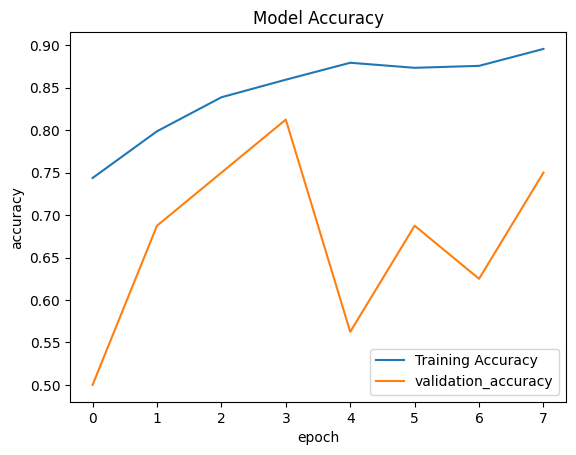

In [10]:
#plotting Accuracy
plt.plot(history.history['accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label= 'validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [14]:
model.save('best_model.keras')


**Evaluate the Model:**
Load the Best model

In [15]:
from tensorflow.keras.models import load_model
best_model = load_model('best_model.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


**Evaluate on Test Data**

In [16]:
val_generator.reset()  # Ensure data is loaded correctly
val_loss, val_acc = best_model.evaluate(val_generator)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

# Confusion matrix and classification report
y_pred = (best_model.predict(val_generator) > 0.5).astype("int32")
y_true = val_generator.classes

print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step - accuracy: 0.7500 - loss: 1.6294
Validation Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
              precision    recall  f1-score   support

      Normal       0.50      0.25      0.33         8
   Pneumonia       0.50      0.75      0.60         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.47        16
weighted avg       0.50      0.50      0.47        16

